# LGBM & XGBM(Assignment)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [2]:
df = pd.read_csv('Titanic_train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking for duplicates

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [9]:
df.loc[df.duplicated()] # Returns duplicated cell

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


NO duplicate values

## Checking for NULL values

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling NULL values

In [11]:
# Handle missing values

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
df['Cabin'].fillna('Unknown', inplace=True)

In [13]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
# Drop non-informative columns

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [15]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'])

## Visualizing the features

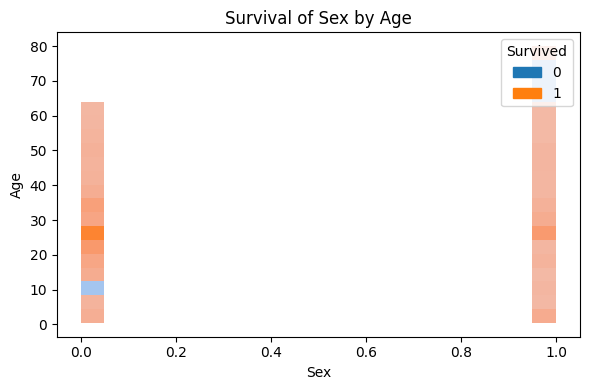

In [16]:
# Plot 1: Survival of Sex by Age

plt.figure(figsize = (6, 4))
sns.histplot(x = 'Sex', y = 'Age', hue = 'Survived', multiple = 'stack', data = df, bins = 20)
plt.title('Survival of Sex by Age')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

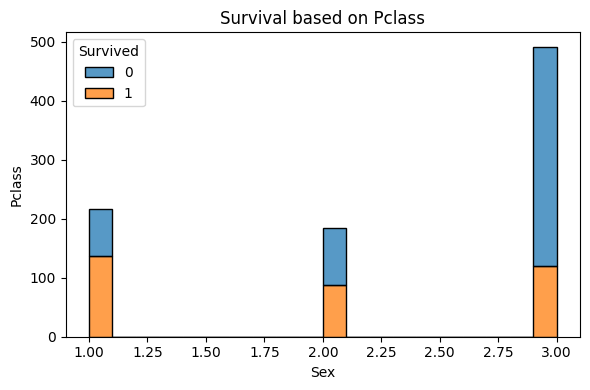

In [17]:
# Plot 2: Survival based on Pclass

plt.figure(figsize = (6, 4))
sns.histplot(x = 'Pclass', hue = 'Survived', multiple = 'stack', data = df, bins = 20)
plt.title('Survival based on Pclass')
plt.xlabel('Sex')
plt.ylabel('Pclass')
plt.tight_layout()
plt.show()

## Split the dataset

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Survived']) # Features
y = df['Survived'] # Target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 7), (179, 7), (712,), (179,))

## Build the model(XGBM)

In [19]:
import xgboost as xgb

In [20]:
xgb_clf = xgb.XGBClassifier(max_depth=6)
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [21]:
y_pred_xgb = xgb_clf.predict(X_test)

## Evaluate the model

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy score =\n', accuracy_score(y_test, y_pred_xgb))
print('\nConfusion Matrix =\n', confusion_matrix(y_test, y_pred_xgb))
print('\nClassification Report:\n', classification_report(y_test, y_pred_xgb))

Accuracy score =
 0.7988826815642458

Confusion Matrix =
 [[87 18]
 [18 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Build the model(LGBM)

In [23]:
import lightgbm as lgb

In [24]:
lgb_clf = lgb.LGBMClassifier(verbose=0)
lgb_clf.fit(X_train,y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(verbose=0)

In [25]:
y_pred_lgb = lgb_clf.predict(X_train)

## Evaluate the model

In [26]:
print('Accuracy score =\n', accuracy_score(y_train, y_pred_lgb))
print('\nConfusion Matrix =\n', confusion_matrix(y_train, y_pred_lgb))
print('\nClassification Report:\n', classification_report(y_train, y_pred_lgb))

Accuracy score =
 0.9452247191011236

Confusion Matrix =
 [[433  11]
 [ 28 240]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       444
           1       0.96      0.90      0.92       268

    accuracy                           0.95       712
   macro avg       0.95      0.94      0.94       712
weighted avg       0.95      0.95      0.94       712



## Hyparameter Tuning

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import lightgbm as lgb
import xgboost as xgb
import numpy as np

## LightGBM Parameters:

In [28]:
param_grid_lgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

## XGBoost Parameters:

In [29]:
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

## Perform Randomized Search

In [30]:
# LightGBM:
lgb_model = lgb.LGBMClassifier()

rs_lgb = RandomizedSearchCV(lgb_model, param_distributions=param_grid_lgb,
                            n_iter=20, scoring='accuracy', cv=5,
                            random_state=42, n_jobs=-1, verbose=1)
rs_lgb.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7, -1],
                                        'n_estimators': [100, 200, 500],
                                        'num_leaves': [15, 31, 63],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [31]:
#XGBoost:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

rs_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_grid_xgb,
                            n_iter=20, scoring='accuracy', cv=5,
                            random_state=42, n_jobs=-1, verbose=1)
rs_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:18:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

## Comparing both models

In [32]:
print("Best parameters for LightGBM:", rs_lgb.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

y_pred_lgb_tuned = rs_lgb.predict(X_test)
y_pred_xgb_tuned = rs_xgb.predict(X_test)

print("\nClassification Report (LightGBM Tuned):")
print(classification_report(y_test, y_pred_lgb_tuned))

print("\nClassification Report (XGBoost Tuned):")
print(classification_report(y_test, y_pred_xgb_tuned))


Best parameters for LightGBM: {'subsample': 1.0, 'num_leaves': 15, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.8}

Classification Report (LightGBM Tuned):
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Classification Report (XGBoost Tuned):
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.

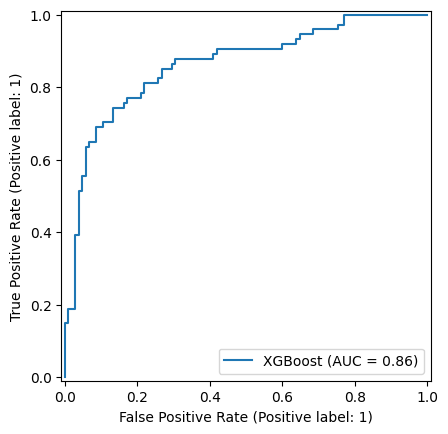

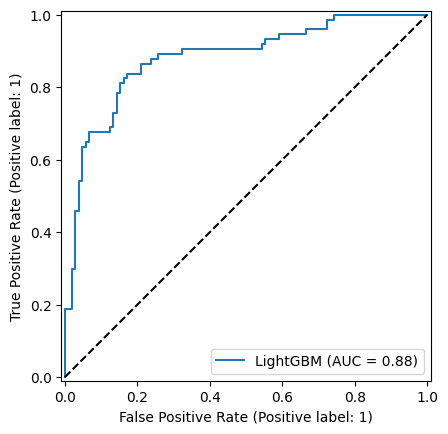

In [33]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test, name='XGBoost')
RocCurveDisplay.from_estimator(lgb_clf, X_test, y_test, name='LightGBM')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.legend()

## Interpretation of strengths and weaknesses of each model

Strengths of XGBoost:

1. better regularization

2. better generalization with level-wise trees

Weakness of XGBoost:

1. manual preprocessing needed for categorical features

Strengths of LGBM:

1. fast training

2. native support for categorical features

Weakness of LGBM:

1. prone to overfitting